In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
train_path = "//content//drive//MyDrive//dataset-20230123T154544Z-001//dataset//train"
valid_path = "//content//drive//MyDrive//dataset-20230123T154544Z-001//dataset//valid"

In [ ]:
def PlotImage(img_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
training_datagen = ImageDataGenerator( rescale=1/225 , rotation_range=40 , width_shift_range=0.2 , height_shift_range=0.2 , shear_range=0.2 , zoom_range = 0.2 , horizontal_flip = True , fill_mode='nearest' )
training_data = training_datagen.flow_from_directory(train_path , target_size=(200,200) , batch_size=128 , class_mode='binary')

Found 3649 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [ ]:
valid_datagen = ImageDataGenerator( rescale=1/255)
valid_data = training_datagen.flow_from_directory(valid_path , target_size=(200,200) , batch_size=128 , class_mode='binary' )

Found 806 images belonging to 2 classes.


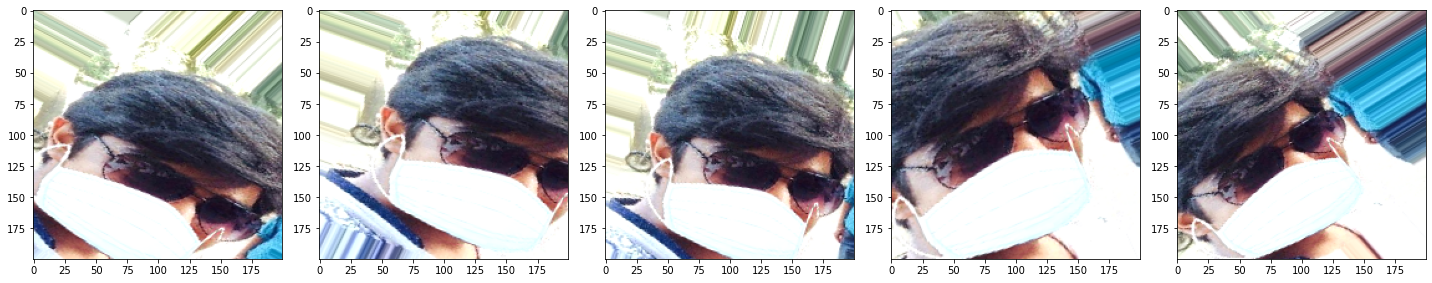

In [ ]:
images = [ training_data[0][0][0] for i in range(5) ]
PlotImage(images)

In [ ]:
model_save_path = "face_mask_detection_model.h5"
checkpoint = ModelCheckpoint(model_save_path , monitor='val_accuracy' ,verbose=1 , save_best_only=True , mode='max')
callbacks_lists = [checkpoint]

In [ ]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units=128, activation='relu'),
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation='relu'),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=2, activation='softmax')

])

In [ ]:
model.compile(optimizer= 'adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [ ]:
history = model.fit(training_data ,
                    epochs=50 ,
                    verbose=1,
                    validation_data= valid_data , callbacks = callbacks_lists )

Epoch 1/50
 5/29 [====>.........................] - ETA: 5:48 - loss: 1.8567 - accuracy: 0.5391

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - ETA: 0s - loss: 0.9811 - accuracy: 0.6448 
Epoch 1: val_accuracy improved from -inf to 0.78164, saving model to face_mask_detection_model.h5
29/29 [==============================] - 633s 22s/step - loss: 0.9811 - accuracy: 0.6448 - val_loss: 0.4349 - val_accuracy: 0.7816
Epoch 2/50
29/29 [==============================] - ETA: 0s - loss: 0.3565 - accuracy: 0.8602
Epoch 2: val_accuracy improved from 0.78164 to 0.87965, saving model to face_mask_detection_model.h5
29/29 [==============================] - 53s 2s/step - loss: 0.3565 - accuracy: 0.8602 - val_loss: 0.3882 - val_accuracy: 0.8797
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 0.3144 - accuracy: 0.8857
Epoch 3: val_accuracy improved from 0.87965 to 0.88337, saving model to face_mask_detection_model.h5
29/29 [==============================] - 52s 2s/step - loss: 0.3144 - accuracy: 0.8857 - val_loss: 0.2979 - val_accuracy: 0.8834
Epoch 4/50
29/29 [=====================

In [ ]:
model.save("face_mask_detection_model.h5")